## Minor Project

# Network Intrusion Detection

In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#setting
pd.set_option("display.max_columns",None)


### Reading the data 

In [2]:
train=pd.read_csv(r"F:\NID\Train_data.csv")
test = pd.read_csv(r"F:\NID\Test_data.csv")

In [3]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71


## Exploratory Data Analysis

In [5]:
print("Training data has rows {} and columns {}".format(train.shape[0],train.shape[1]))

Training data has rows 25192 and columns 42


In [6]:
print("Test data has rows {} and columns {}".format(test.shape[0],test.shape[1]))

Test data has rows 22544 and columns 41


In [7]:
#checking the name of all the columns present in the training data set
train.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [8]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.0,25192.0,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,0.001548,0.001350,0.249841,0.014727,0.000357,0.004327,0.0,0.0,0.009130,84.591180,27.698754,0.286338,0.283762,0.118630,0.120260,0.660559,0.062363,0.095931,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,0.039316,0.048785,11.500842,0.529602,0.018898,0.098524,0.0,0.0,0.095115,114.673451,72.468242,0.447312,0.447599,0.318745,0.322335,0.439637,0.178550,0.256583,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,144.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,1.000000,2.000000,975.000000,40.000000,1.000000,8.000000,0.0,0.0,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
#Chechking the columns for absolute 0 values in the above table
train["num_outbound_cmds"].value_counts()


0    25192
Name: num_outbound_cmds, dtype: int64

In [10]:
train["is_host_login"].value_counts()

0    25192
Name: is_host_login, dtype: int64

In [11]:
test["num_outbound_cmds"].value_counts()

0    22544
Name: num_outbound_cmds, dtype: int64

In [12]:
test["is_host_login"].value_counts()

0    22533
1       11
Name: is_host_login, dtype: int64

### So the column "num_outbound_cmds" is redundant with only '0' as it all values both in training and test dataset , so we will drop the column from both the datasets.

In [13]:
train=train.drop(["num_outbound_cmds"],axis=1)
test=test.drop(["num_outbound_cmds"],axis=1)

In [14]:
train.columns 



Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [15]:
test.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'],
      dtype='object')

### Checking our target variable i.e. "class" . Now "class" is the variable that tells whether the network has anomaly or not.

In [16]:
train["class"].value_counts()

normal     13449
anomaly    11743
Name: class, dtype: int64

In [17]:
train["class"].value_counts().sum()

25192

#### Changing the values "Normal" and "Anomaly" to 0 and 1 respectively for trainig the model.

In [18]:
train["class"]=train["class"].replace(to_replace = "normal",value = 0)
train["class"]=train["class"].replace(to_replace = "anomaly" , value =1)

In [19]:
train["class"]

0        0
1        0
2        1
3        0
4        0
        ..
25187    1
25188    1
25189    1
25190    1
25191    1
Name: class, Length: 25192, dtype: int64

### So it is clear that our target column has only two values and there are no missing values in the column.

### Now seperating the target variable from our training data set.

In [20]:
train_y = train["class"]
train_x = train.drop(["class"],axis=1)

In [21]:
train_y.head()

0    0
1    0
2    1
3    0
4    0
Name: class, dtype: int64

In [22]:
train_x.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'],
      dtype='object')

### Encoding the categorical variable

In [23]:
train_x=train_x.drop(["service"],axis=1)

In [24]:
train_x.dtypes

duration                         int64
protocol_type                   object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate                float64
rerror_rate                    float64
srv_rerror_rate          

In [25]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [26]:
train_cat = train_x.select_dtypes(include = ["object"]).copy()
test_cat = test.select_dtypes(include = ["object"]).copy()

In [27]:
train_cat_x = train_cat.apply(encoder.fit_transform)
test_cat_x = test_cat.apply(encoder.fit_transform)


In [28]:
train_cat_x

,protocol_type,flag
0,1,9
1,2,9
2,1,5
3,1,9
4,1,9
...,...,...
25187,1,2
25188,1,9
25189,1,1
25190,1,5


### Standardizing the numerical variables

In [29]:
col = train_x.select_dtypes(include =["float64" , "int64"] ).columns

In [30]:
train_num = train_x.select_dtypes(include =["float64" , "int64"] ).copy()
test_num = test.select_dtypes(include = ["float64","int64"]).copy()

In [31]:
train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,7,0.0,0.0,1.0,1.0,0.07,0.07,0.00,255,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,1
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,1,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,1
25189,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,105,7,0.0,0.0,1.0,1.0,0.07,0.07,0.00,255,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,129,18,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1


In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_num_x = scaler.fit_transform(train_num)
test_num_x = scaler.fit_transform(test_num)

In [33]:
train_x_num = pd.DataFrame(train_num_x,columns = col)
test_num = pd.DataFrame(test_num_x,columns = col)

In [34]:
test_num.shape

(22544, 37)

In [35]:
#Now getting back the complete datset with standrdised numerical values and encoded categorical values
train_x = pd.concat((train_x_num, train_cat_x), axis =1 )
test = pd.concat((test_num,test_cat_x), axis = 1)

In [36]:
print(train_x.shape)
print(test.shape)

(25192, 39)
(22544, 40)


## Feature Selection

In [37]:
a=pd.concat([train_x,train_y],axis=1)
cor = a.corr()
cor1 = cor.index

In [38]:
cor

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,flag,class
duration,1.000000,0.084864,0.013258,-0.001012,-0.010358,-0.000486,0.004202,0.011108,-0.063703,0.095215,0.050547,0.094243,0.094066,0.088272,-0.001585,0.070206,NaN,-0.002050,-0.081787,-0.040642,-0.072458,-0.071832,0.209441,0.208354,0.075723,-0.012009,-0.041115,0.055174,-0.112530,-0.119321,0.263489,0.240970,-0.025485,-0.066513,-0.066240,0.187070,0.208435,0.036421,-0.066634,0.050901
src_bytes,0.084864,1.000000,0.003611,-0.000090,-0.000916,-0.000062,0.000995,-0.000260,-0.002040,-0.000196,-0.000383,-0.000267,-0.000209,-0.000218,-0.000158,-0.000422,NaN,-0.000932,-0.007302,-0.003623,-0.006312,-0.006225,0.016015,0.015816,0.007673,-0.003098,-0.003077,-0.009764,-0.008520,-0.006776,0.001026,0.002316,-0.001238,-0.006346,-0.006227,-0.002130,0.006190,-0.001286,-0.006599,0.005743
dst_bytes,0.013258,0.003611,1.000000,-0.000350,-0.003586,0.000345,0.002539,0.005197,0.012704,0.035852,0.020214,0.035041,0.035171,0.008456,-0.000146,0.024142,NaN,-0.001161,-0.027824,-0.012524,-0.022390,-0.022443,-0.013843,-0.013664,0.030018,-0.012300,-0.007560,-0.030930,-0.000980,0.022392,-0.012971,0.024078,-0.006006,-0.015584,-0.014543,-0.014094,-0.012803,-0.004734,0.027606,-0.010949
land,-0.001012,-0.000090,-0.000350,1.000000,-0.000813,-0.000056,-0.000819,-0.000234,-0.007196,-0.000195,-0.000351,-0.000247,-0.000194,-0.000248,-0.000168,-0.000391,NaN,-0.000855,-0.006495,-0.003221,0.014216,0.014259,-0.003316,-0.003324,0.006880,-0.003112,0.014033,-0.016340,-0.008743,0.009531,-0.003929,0.024635,0.053037,0.014291,0.005596,-0.003432,-0.003335,-0.001123,-0.006593,0.000605
wrong_fragment,-0.010358,-0.000916,-0.003586,-0.000813,1.000000,-0.000575,-0.008386,-0.002392,-0.073674,-0.001995,-0.003592,-0.002524,-0.001982,-0.002537,-0.001725,-0.004006,NaN,-0.008756,-0.023241,0.023377,-0.045228,-0.057834,-0.033464,-0.034035,0.056683,-0.027428,-0.028744,0.040020,-0.047256,-0.051845,0.053177,0.034670,-0.020174,-0.053786,-0.057230,0.027718,-0.034143,0.176420,0.068693,0.097625
urgent,-0.000486,-0.000062,0.000345,-0.000056,-0.000575,1.000000,0.002346,-0.000165,0.007801,0.002886,0.160007,-0.000174,0.007533,0.011722,-0.000119,-0.000277,NaN,-0.000605,-0.004593,-0.002321,-0.004033,-0.003994,-0.002345,-0.002351,0.004865,-0.002201,-0.002356,0.004612,-0.006324,-0.007014,-0.002105,-0.003013,-0.001815,-0.004044,-0.003953,-0.002427,-0.002358,-0.000794,0.004744,0.006743
hot,0.004202,0.000995,0.002539,-0.000819,-0.008386,0.002346,1.000000,0.004893,0.113115,0.002005,0.021221,0.000478,0.000703,0.067417,0.012888,0.003070,NaN,0.833556,-0.066655,-0.033420,-0.057841,-0.057147,-0.031452,-0.030326,0.068594,-0.021225,-0.023868,-0.009083,-0.048495,-0.033442,-0.007962,-0.030640,-0.021170,-0.055628,-0.056255,-0.027628,-0.029719,-0.011589,0.067027,-0.012839
num_failed_logins,0.011108,-0.000260,0.005197,-0.000234,-0.002392,-0.000165,0.004893,1.000000,-0.006872,0.015787,-0.001032,0.088854,0.012654,0.052082,-0.000496,-0.001152,NaN,0.034240,-0.019060,-0.009576,-0.014831,-0.014670,0.025888,0.025467,0.020245,-0.009158,-0.009803,-0.026460,-0.022315,-0.003336,0.000298,-0.008910,-0.007551,-0.009527,-0.010238,0.016791,0.018693,-0.003305,-0.010920,0.000028
logged_in,-0.063703,-0.002040,0.012704,-0.007196,-0.073674,0.007801,0.113115,-0.006872,1.000000,0.027083,0.048756,0.034255,0.026899,0.034125,0.023408,0.054378,NaN,0.118000,-0.539870,-0.198765,-0.491999,-0.490154,-0.284245,-0.279543,0.600093,-0.220632,0.131740,-0.395905,0.624839,0.607379,-0.255820,-

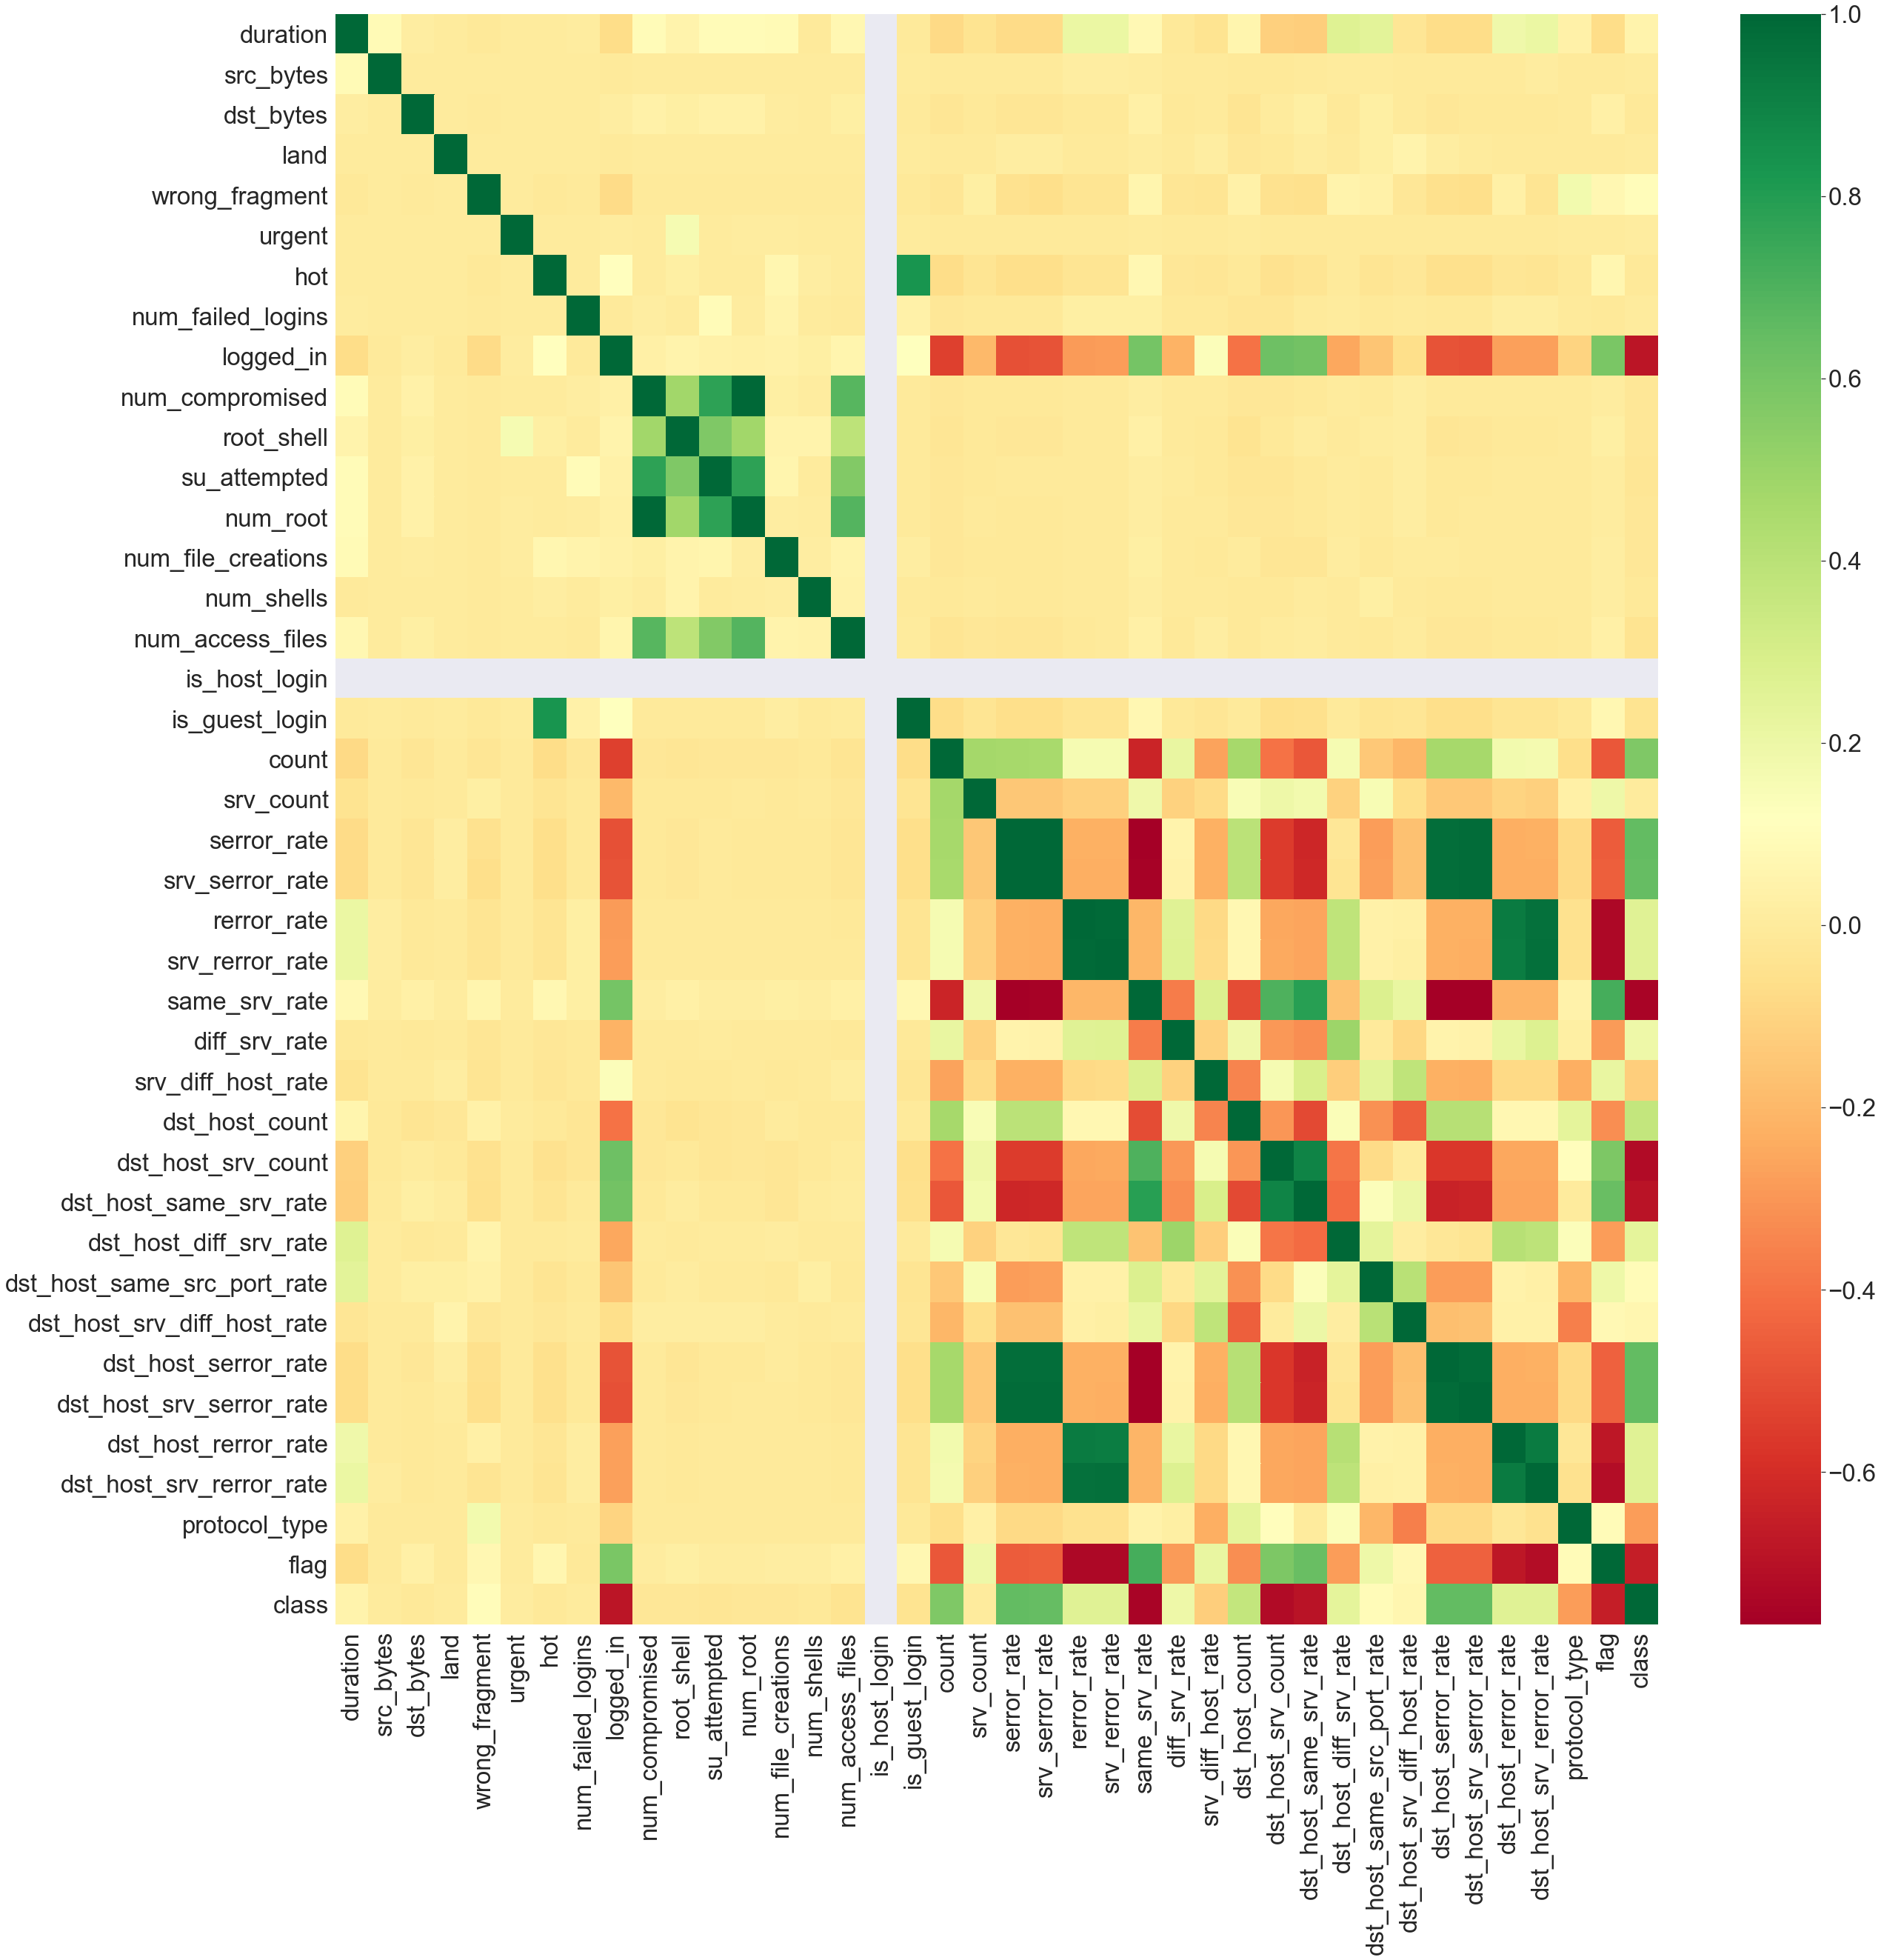

In [39]:
plt.figure(figsize=(40,40))
sns.set(font_scale = 3)
sns.heatmap(a[cor1].corr(), annot= False , cmap = "RdYlGn")


#### From the above map we can see that few features are correlated to each other and hence they are unnecessary ,, hence dropping those columns

In [40]:
#dropping srv
train_x=train_x.drop(["srv_serror_rate","srv_rerror_rate","dst_host_srv_serror_rate","dst_host_srv_rerror_rate","num_root","dst_host_same_srv_rate" ,"dst_host_serror_rate","dst_host_rerror_rate"],axis=1)

In [41]:
train_x.shape

(25192, 31)

[4.20474914e-03 2.54852045e-02 1.33169107e-02 4.08631141e-05
 1.33968649e-02 8.24297667e-05 1.41284190e-02 2.95203838e-04
 1.26112889e-01 5.65882032e-03 3.86727945e-04 1.13285768e-04
 3.51854107e-04 1.75223846e-05 1.29092419e-04 0.00000000e+00
 2.11024152e-03 3.17520128e-02 1.61482132e-02 1.40165902e-01
 3.42215292e-02 1.76878195e-01 2.87175750e-02 1.37639864e-02
 3.50303785e-02 9.92018371e-02 2.50215186e-02 4.91887963e-02
 1.77741136e-02 6.39668887e-02 6.23379755e-02]


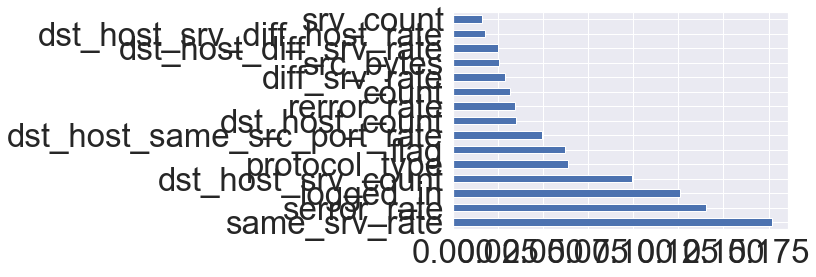

In [42]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(train_x,train_y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=train_x.columns)
feat_importances.nlargest(15).plot(kind='barh')
sns.set(font_scale=1)
plt.show()

### The above 15 features will be used for training various models

In [43]:
train_x = pd.DataFrame(train_x[["flag","dst_host_srv_count","same_srv_rate","serror_rate","logged_in","protocol_type","count","dst_host_same_src_port_rate","dst_host_count","rerror_rate","src_bytes","dst_host_diff_srv_rate","dst_host_diff_srv_rate","hot","srv_count"]])

In [44]:
train_x.columns

Index(['flag', 'dst_host_srv_count', 'same_srv_rate', 'serror_rate',
       'logged_in', 'protocol_type', 'count', 'dst_host_same_src_port_rate',
       'dst_host_count', 'rerror_rate', 'src_bytes', 'dst_host_diff_srv_rate',
       'dst_host_diff_srv_rate', 'hot', 'srv_count'],
      dtype='object')

## Data Visualization

### Univariate Analysis

In [45]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


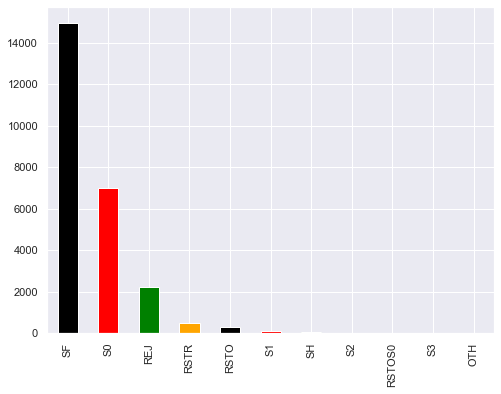

In [46]:
train["flag"].value_counts().plot(kind = "bar", color = ["black" , "red" ,"green" , "orange"] , figsize=(8,6))


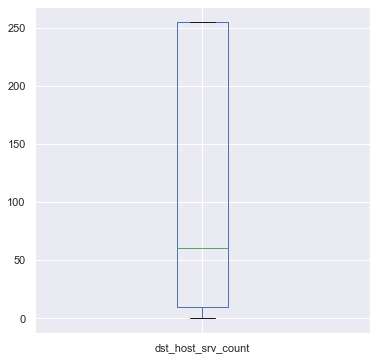

In [47]:
train["dst_host_srv_count"].plot(kind = "box",figsize=(6,6))

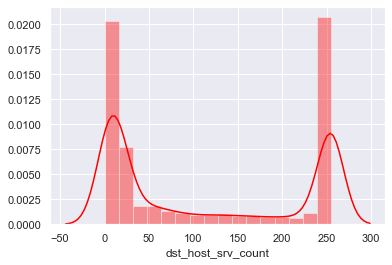

In [48]:
sns.distplot(train["dst_host_srv_count"] , hist = True , kde = True , color = "red")

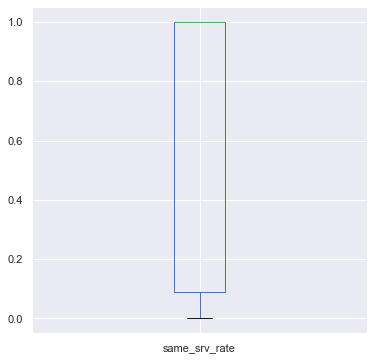

In [49]:
train["same_srv_rate"].plot(kind = "box",figsize=(6,6))

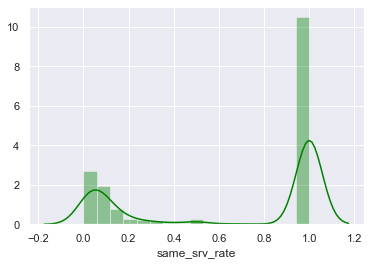

In [50]:
sns.distplot(train["same_srv_rate"] , hist = True , kde = True , color = "green")

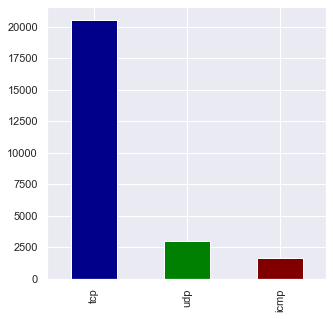

In [51]:
train["protocol_type"].value_counts().plot.bar(color = ["darkblue" , "green", "Maroon"],figsize=(5,5))

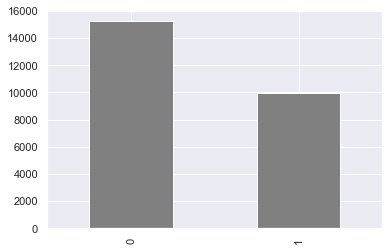

In [52]:
train["logged_in"].value_counts().plot.bar(color = "grey")

### Bivariate Analysis

In [53]:
train[train_x.columns]

,flag,dst_host_srv_count,same_srv_rate,serror_rate,logged_in,protocol_type,count,dst_host_same_src_port_rate,dst_host_count,rerror_rate,src_bytes,dst_host_diff_srv_rate,dst_host_diff_srv_rate,hot,srv_count
0,SF,25,1.00,0.0,0,tcp,2,0.17,150,0.0,491,0.03,0.03,0,2
1,SF,1,0.08,0.0,0,udp,13,0.88,255,0.0,146,0.60,0.60,0,1
2,S0,26,0.05,1.0,0,tcp,123,0.00,255,0.0,0,0.05,0.05,0,6
3,SF,255,1.00,0.2,1,tcp,5,0.03,30,0.0,232,0.00,0.00,0,5
4,SF,255,1.00,0.0,1,tcp,30,0.00,255,0.0,199,0.00,0.00,0,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,RSTO,7,0.07,0.0,0,tcp,100,0.00,255,1.0,0,0.06,0.06,0,7
25188,SF,39,1.00,0.0,1,tcp,1,1.00,1,0.0,334,0.00,0.00,0,1
25189,REJ,13,0.07,0.0,0,tcp,105,0.00,255,1.0,0,0.07,0.07,0,7
25190,S0,20,0.14,1.0,0,tcp,129,0.00,255,0.0,0,0.06,0.06,0,18


C:\Users\Ravi\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\style.py:60: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  [conv.to_rgba(c) for c in colors]


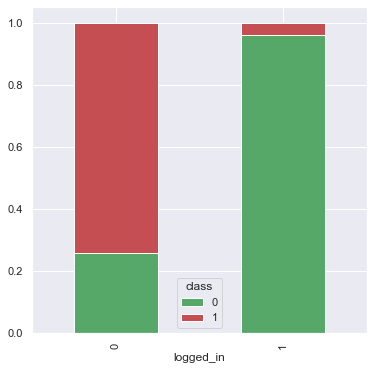

In [54]:
logg = pd.crosstab(train["logged_in"] ,train_y)
logg.div(logg.sum(1).astype(float),axis = 0).plot.bar(stacked = True ,figsize = (6,6), color= "GrR")

#### It is clear from the above visualization that that network is more prone to attack when the host is not logged in .

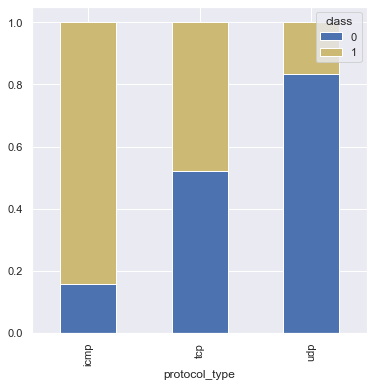

In [55]:
pro_type = pd.crosstab(train["protocol_type"] , train_y)
pro_type.div(pro_type.sum(1).astype(float) ,axis = 0).plot.bar(stacked = True ,figsize = (6,6), color = "Byl")

#### ICMP is more prone to attack followed bt tcp and then udp

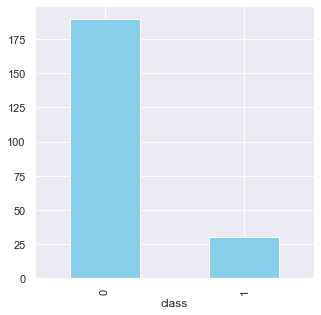

In [56]:
train.groupby("class")["dst_host_srv_count"].mean().plot.bar(figsize = (5,5), color = "SkyBlue")

#### From the above visualization it can be deduced that dst_host_srv_count for an anomalous network is never more than 30.

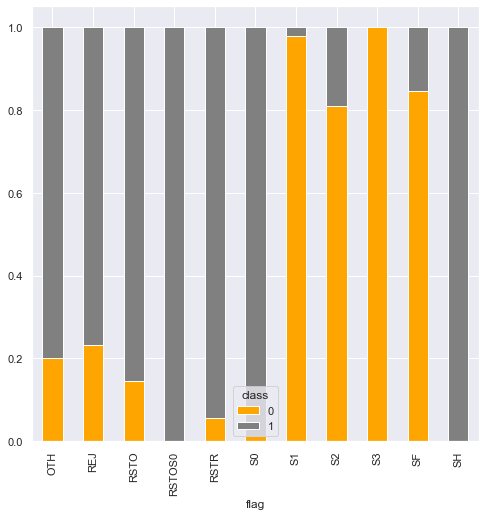

In [88]:
flag = pd.crosstab(train["flag"], train_y)
flag.div(flag.sum(1).astype(float),axis = 0).plot.bar(stacked = True , figsize = (8,8),color = ["Orange","Grey"])

## Now splitting data, fitting models and making predictions

In [69]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y = train_test_split(train_x,train_y,test_size = 0.3)

### 1. Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [47]:
lr = LogisticRegression(max_iter = 8000)
lr.fit(train_X,train_Y)
lr_pred=lr.predict(train_X)

In [48]:
accuracy_score(train_Y,lr_pred)

0.9371668367925599

In [49]:
lr_test_pred = lr.predict(test_X)
accuracy_score(test_Y,lr_test_pred)

0.9375496163006086

In [50]:
confusion_matrix(test_Y,lr_test_pred)

array([[3801,  223],
       [ 249, 3285]], dtype=int64)

### Accuracy acheived on training dataset was 94% and on test dataset it was 93%

## 2. Decision Tree Classifier

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
dtc = DecisionTreeClassifier()
dtc.fit(train_X,train_Y)
dtc_pred= dtc.predict(train_X)


In [53]:
#accuracy score on training set
accuracy_score(train_Y,dtc_pred)

0.9998865827378927

In [54]:
test_dtc_pred = dtc.predict(test_X)
accuracy_score(test_Y,test_dtc_pred)

0.9957660756813972

### Here we , acheived an accuracy of over 99% !!

## 3. Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(train_X,train_Y)
rfc_pred = rfc.predict(train_X)


In [56]:
#accuracy on train test set
accuracy_score(train_Y,rfc_pred)

0.9998865827378927

In [57]:
rfc_test_pred = rfc.predict(test_X)
accuracy_score(test_Y,rfc_test_pred)

0.9955014554114845

### Random Forest Classifier has an accuracy of around 99% 

## 4.  K Neighbour Classifier

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_jobs = 1)


In [59]:
knn.fit(train_X,train_Y)
knn_pred = knn.predict(train_X)

In [60]:
#Accuracy on the train set
accuracy_score(train_Y,knn_pred)

0.9931382556425088

In [61]:
#accuracy on the test set
knn_test_pred = knn.predict(test_X)
accuracy_score(test_Y,knn_test_pred)

0.991002910822969

### K Neighbour Classifier acheived an accuray score of 98 % .

## 5. Support Vector Classifier

In [62]:
from sklearn.svm import SVC
svc = SVC(gamma = "scale")
svc.fit(train_X,train_Y)
svc_pred = svc.predict(train_X)

In [63]:
#Accuracy score on training dataset
accuracy_score(train_Y,svc_pred)

0.9647272314846319

In [64]:
#Accuracy score on test set
svc_test_pred = svc.predict(test_X)
accuracy_score(test_Y,svc_test_pred)

0.9636147128870072

### Support Vector Machine achieved an accuracy of 96%

# Deep learning model

In [58]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [61]:
ntwk = Sequential()

In [65]:
#Input and first layer
ntwk.add(Dense(units = 10 , kernel_initializer = "uniform", activation = "relu" , input_dim =15))

In [ ]:
#Second layer
ntwk.add(Dense(units = 10 , kernel_initializer ="uniform" ,activation = "relu"))

In [67]:
#output layer
ntwk.add(Dense(units = 1 , kernel_initializer = "uniform",activation = "sigmoid"))

In [72]:
#compiling the neural network
ntwk.compile(optimizer = "adam" , loss = "binary_crossentropy", metrics =["accuracy"])

In [73]:
#Feeding our data into the network
ntwk.fit(train_X,train_Y ,batch_size = 10 , epochs = 100)


Epoch 1/100
1764/1764 [==============================] - 12s 3ms/step - loss: 0.3157 - accuracy: 0.9044
Epoch 2/100
1764/1764 [==============================] - 4s 2ms/step - loss: 0.1469 - accuracy: 0.9418
Epoch 3/100
1764/1764 [==============================] - 3s 2ms/step - loss: 0.1272 - accuracy: 0.9506
Epoch 4/100
1764/1764 [==============================] - 3s 2ms/step - loss: 0.1179 - accuracy: 0.9559
Epoch 5/100
1764/1764 [==============================] - 4s 2ms/step - loss: 0.1074 - accuracy: 0.9547
Epoch 6/100
1764/1764 [==============================] - 4s 2ms/step - loss: 0.0928 - accuracy: 0.9595
Epoch 7/100
1764/1764 [==============================] - 3s 2ms/step - loss: 0.0899 - accuracy: 0.9585
Epoch 8/100
1764/1764 [==============================] - 3s 2ms/step - loss: 0.0884 - accuracy: 0.9639
Epoch 9/100
1764/1764 [==============================] - 4s 2ms/step - loss: 0.0907 - accuracy: 0.9644
Epoch 10/100
1764/1764 [==============================] - 3s 2ms/step - 

In [74]:
train_y_pred = ntwk.predict(train_X) > 0.5


In [75]:
from sklearn.metrics import accuracy_score
accuracy_score(train_y_pred , train_Y)

0.983327662470228

In [79]:
test_y_pred = ntwk.predict(test_X) > 0.5

In [80]:
accuracy_score(test_y_pred , test_Y)

0.9826673723207198

## Hence we can say that our model is not overfitting and hence is clearly able to genralize the data and hence acheiving an accuracy of 98 %


## Designing the Architecture of the model

#### Defining Mathematical functions

In [65]:
#sigmoid function
def sigmoid(x):
    sig = 1/(1+np.exp(-x))
    return(sig)

In [66]:
def relu(x):
    rel = np.maximum(0,x)
    return(rel)
    

#### Forward propagation

In [67]:
def forward_propagation(X,parameters):
    #getting the paarmeters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    # lINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    z1 = np.dot(W1, X) + b1
    a1 = relu(z1)
    z2 = np.dot(W2, a1) + b2
    a2 = relu(z2)
    z3 = np.dot(W3, a2) + b3
    a3 = sigmoid(z3)
    
    cache = (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3)
    return(a3 , cache)
    
    

#### Backward Propagation

In [98]:
def backward_propagation(X,Y, cache):
    m= X.shape[1]
    (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3) = cache
    
    dz3 = 1./m * (a3-Y)
    dw3 = np.dot(dz3,a2.T)
    db3 = np.sum(dz3, axis =1,keepdims = True )
    
    da2 = np.dot(W3.T, dz3)
    dz2 = np.multiply(da2,np.int64(a2>0))
    dw2 = np.dot(dz2 ,a1.T)
    db2 = np.sum(dz2, axis = 1 , keep_dims = True)
    
    da1 = np.dot(W2.T ,dz2)
    dz1 = np.multiply(da1,np.int64(a1 >0))
    dw1 = np.dot(dz1,X.T)
    db1 = np.sum(dz1,axis =1 ,keep_dims = True)
    
    gradients = {"dz3":z3 , "dw3":dw3 , "db3":db3,
                 "da2":da2, "dz2":dz2, "dw2":dw2 ,"db2":db2,
                 "da1":da1, "dz1":dz1 ,"dw1":dw1 ,"db1":db1}
    return gradients
    

#### Updating the parameters

In [69]:
def update_parameters(parameters, grads, learning_rate):
    L =len(parameters)//2
    for k in range(1,L):
        parameters["W"+ str(k)] = parameters["W"+str(k)] - learning_rate * grad["dW" + str(k)]
        parameters["W"+ str(k)] = parameters["W"+str(K)] - learning_rate * grad["db" + str(k)]
    return parameters

#### computing the loss

In [104]:
def compute_loss(a3,Y):
    m = Y.shape[1]
    log_probs = (np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1-a3),(1-Y))).astype(int)
    loss = 1/m * np.nansum(log_probs)
    return loss


#### predict

In [71]:
def predict(X,y,parameters):
    m = X.shape[0]
    p =np.zeros((1,m),dtype = np.int)
    #forward propagation
    a3,caches = forward_propagation(X, parameters)
    
    #converting the probs to 0 and 1
    for i in range (0, a3.shape[1]):
        if(a3[0,i] > 0.5):
            p[0,i] =1;
        else:
            p[0,i] =0;
    #print results 
    print("Accuracy: " + str(np.mean((p[0, :] == y[0, :]))))
    return p

    

In [81]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    plt.show()

### For training the model

In [73]:
def model(X,Y, learning_rate = 0.01 , num_iterations = 15000 ,print_cost = True):
    grads = {}
    costs = [] #kepping track of the loss
    m =X.shape[1]
    layers_dims = [X.shape[0],10,5,1]
    parameters = initialize_he(layers_dims)
    
    #looping 
    for i in range(0,num_iterations):
        #forward_propagation
        a3, cache = forward_propagation(X ,parameters)
        
        #loss
        cost = compute_loss(a3,Y)
        
        #backward_propagation
        grads = backward_propagation(X,Y,cache)
         
        #updating parameters
        parameters = update_parameters(parameters , grads , learning_rate)
        
        #printing the loss after every 1000 iterations 
        if print_cost and i%1000 == 0:
            print("Cost after iteration {}: is {}".format(i,cost))
            costs.append(cost)
    #plotting the loss
    plt.plot(costs)
    plt.ylabel("cost")
    plt.xlabel("iterations (per_hundreds)")
    plt.title("Learning_rate =" + str(learning_rate))
    
    return parameters

            
            

### Initializing the weights with He parameters

In [74]:
def initialize_he(layers_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims) - 1
    for i in range(1,L+1):
        parameters["W" + str(i)] = np.random.randn(layers_dims[i] , layers_dims[i-1])*np.sqrt(2/layers_dims[i-1])
        parameters["b" + str(i)] = np.zeros((layers_dims[i],1))
    return parameters
    

In [217]:
parameters = initialize_he([5,4,1])
print("W1 =" + str(parameters["W1"]))
print("b1 =" + str(parameters["b1"]))
print("W2 =" + str(parameters["W2"]))
print("b2 =" + str(parameters["b2"]))


W1 =[[ 1.13122797  0.27607307  0.06103036 -1.17857627 -0.1754357 ]
 [-0.22436928 -0.05233031 -0.39655005 -0.02771304 -0.30181918]
 [-0.83096103  0.55948432  0.55739447  1.08122894  0.03164405]
 [-0.25594047 -0.34491592 -0.97807813  0.62130372 -0.69637631]]
b1 =[[0.]
 [0.]
 [0.]
 [0.]]
W2 =[[-0.83795444 -0.14541644  1.05086558  0.16738368]]
b2 =[[0.]]


In [144]:
train_y = pd.DataFrame(a["class"])
train_y = train_y.to_numpy()
train_y = train_y.flatten()
train_x = a.drop(["class"],axis = 1)
train_x = train


In [ ]:
parameters = model(b, c)
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

In [114]:
c = np.array(train_Y).reshape(-1,1)

In [108]:
a = np.array(train_X[train_X.columns])

In [112]:
b = a.reshape(a.shape[0],-1).T

In [113]:
b

array([[ 9.00000000e+00,  5.00000000e+00,  5.00000000e+00, ...,
         5.00000000e+00,  1.00000000e+00,  9.00000000e+00],
       [-5.69714686e-04, -8.86288059e-01, -5.33808310e-01, ...,
        -9.40515713e-01, -8.19111953e-02,  1.26474221e+00],
       [ 7.72108662e-01, -1.13859482e+00, -7.51904827e-01, ...,
        -4.56200717e-01,  7.72108662e-01,  7.72108662e-01],
       ...,
       [-2.27250898e-01,  9.32835003e-02,  3.98611006e-02, ...,
        -1.20406098e-01, -4.40940496e-01, -4.40940496e-01],
       [-9.19333526e-02, -9.19333526e-02, -9.19333526e-02, ...,
        -9.19333526e-02, -9.19333526e-02, -9.19333526e-02],
       [-3.68427366e-01, -1.47636615e-01, -2.44232568e-01, ...,
        -1.33837193e-01, -3.68427366e-01, -3.40828522e-01]])